In [1]:
# Necessary because jupyter restricts relative imports from parent directories
import os
if os.getcwd().split('/')[-1] != 'tcav':
    print(os.getcwd())
    os.chdir('../')
    os.chdir('../')
    os.chdir('../')    
    print(os.getcwd())

/code/tcav/tcav_examples/discrete
/code


In [2]:
from tensorflow.io import gfile
from tcav.tcav_examples.discrete.kdd99_activation_generator import KDD99DiscreteActivationGenerator
from tcav.utils import create_session
from tcav.tcav_examples.discrete.kdd99_model_wrapper import KDD99KerasModelWrapper


In [3]:
# Make source directory, 
source_dir = "./tcav/tcav_examples/discrete/kdd_sanity2"
working_dir = source_dir
acts_dir = os.path.join(working_dir, "activations")
gfile.makedirs(acts_dir)
cav_dir = os.path.join(working_dir, "cav")
gfile.makedirs(cav_dir)


In [4]:
# Make data
! python ./tcav/tcav_examples/discrete/make_kdd99_concepts.py --source_dir={source_dir}


2021-03-26 18:59:27.860577: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
[[0 b'tcp' b'http' ... 0.0 0.0 0.0]
 [0 b'tcp' b'http' ... 0.0 0.0 0.0]
 [0 b'tcp' b'http' ... 0.0 0.0 0.0]
 ...
 [0 b'tcp' b'http' ... 0.01 0.0 0.0]
 [0 b'tcp' b'http' ... 0.01 0.0 0.0]
 [0 b'tcp' b'http' ... 0.01 0.0 0.0]]
[b'normal.' b'normal.' b'normal.' ... b'normal.' b'normal.' b'normal.']
Available concepts for KDD99 dataset are: 
['dst_host_same_src_port_rate_less_than_one', 'dst_host_same_src_port_rate_more_than_one', 'serror_rate_less_than_one', 'serror_rate_more_than_one']


Available targets for KDD99 dataset are: 
[b'normal.' b'buffer_overflow.' b'loadmodule.' b'perl.' b'neptune.'
 b'smurf.' b'guess_passwd.' b'pod.' b'teardrop.' b'portsweep.' b'ipsweep.'
 b'land.' b'ftp_write.' b'back.' b'imap.' b'satan.' b'phf.' b'nmap.'
 b'multihop.' b'warezmaster.' b'warezclient.' b'spy.' b'rootkit.']


Created 10 random folders 

Successfully

In [5]:
# Create models
label_path = os.path.join(source_dir, "labels.txt")
model_path = os.path.join(source_dir, "kdd99_2.h5")
uci_model = KDD99KerasModelWrapper(create_session(), model_path, label_path)



In [6]:
# Create activation generator
act_gen = KDD99DiscreteActivationGenerator(model=uci_model, source_dir=source_dir, acts_dir=acts_dir, max_examples=200)

In [13]:
from tcav.utils import create_session
import tcav.utils_plot as utils_plot # utils_plot requires matplotlib
from tcav.tcav import TCAV
import absl
absl.logging.set_verbosity(0)

target = "guess_passwd."
bottlenecks = ["dense", "dense_1" ]
concepts = ['dst_host_same_src_port_rate_less_than_one', 'dst_host_same_src_port_rate_more_than_one', 
            'serror_rate_less_than_one', 'serror_rate_more_than_one']
alphas = [0.01]



my_tcav = TCAV(create_session,
                   target,
                   concepts,
                   bottlenecks,
                   act_gen,
                   alphas,
                   cav_dir=cav_dir,
                   num_random_exp=10)


results = my_tcav.run(run_parallel)


INFO:tensorflow:dense ['dst_host_same_src_port_rate_less_than_one', 'random500_0'] guess_passwd. 0.01
INFO:tensorflow:dense ['dst_host_same_src_port_rate_less_than_one', 'random500_1'] guess_passwd. 0.01
INFO:tensorflow:dense ['dst_host_same_src_port_rate_less_than_one', 'random500_2'] guess_passwd. 0.01
INFO:tensorflow:dense ['dst_host_same_src_port_rate_less_than_one', 'random500_3'] guess_passwd. 0.01
INFO:tensorflow:dense ['dst_host_same_src_port_rate_less_than_one', 'random500_4'] guess_passwd. 0.01
INFO:tensorflow:dense ['dst_host_same_src_port_rate_less_than_one', 'random500_5'] guess_passwd. 0.01
INFO:tensorflow:dense ['dst_host_same_src_port_rate_less_than_one', 'random500_6'] guess_passwd. 0.01
INFO:tensorflow:dense ['dst_host_same_src_port_rate_less_than_one', 'random500_7'] guess_passwd. 0.01
INFO:tensorflow:dense ['dst_host_same_src_port_rate_less_than_one', 'random500_8'] guess_passwd. 0.01
INFO:tensorflow:dense ['dst_host_same_src_port_rate_less_than_one', 'random500_9']

INFO:tensorflow:dense ['random500_6', 'random500_9'] guess_passwd. 0.01
INFO:tensorflow:dense ['random500_7', 'random500_0'] guess_passwd. 0.01
INFO:tensorflow:dense ['random500_7', 'random500_1'] guess_passwd. 0.01
INFO:tensorflow:dense ['random500_7', 'random500_2'] guess_passwd. 0.01
INFO:tensorflow:dense ['random500_7', 'random500_3'] guess_passwd. 0.01
INFO:tensorflow:dense ['random500_7', 'random500_4'] guess_passwd. 0.01
INFO:tensorflow:dense ['random500_7', 'random500_5'] guess_passwd. 0.01
INFO:tensorflow:dense ['random500_7', 'random500_6'] guess_passwd. 0.01
INFO:tensorflow:dense ['random500_7', 'random500_8'] guess_passwd. 0.01
INFO:tensorflow:dense ['random500_7', 'random500_9'] guess_passwd. 0.01
INFO:tensorflow:dense ['random500_8', 'random500_0'] guess_passwd. 0.01
INFO:tensorflow:dense ['random500_8', 'random500_1'] guess_passwd. 0.01
INFO:tensorflow:dense ['random500_8', 'random500_2'] guess_passwd. 0.01
INFO:tensorflow:dense ['random500_8', 'random500_3'] guess_passw

INFO:tensorflow:dense_1 ['random500_3', 'random500_6'] guess_passwd. 0.01
INFO:tensorflow:dense_1 ['random500_3', 'random500_7'] guess_passwd. 0.01
INFO:tensorflow:dense_1 ['random500_3', 'random500_8'] guess_passwd. 0.01
INFO:tensorflow:dense_1 ['random500_3', 'random500_9'] guess_passwd. 0.01
INFO:tensorflow:dense_1 ['random500_4', 'random500_0'] guess_passwd. 0.01
INFO:tensorflow:dense_1 ['random500_4', 'random500_1'] guess_passwd. 0.01
INFO:tensorflow:dense_1 ['random500_4', 'random500_2'] guess_passwd. 0.01
INFO:tensorflow:dense_1 ['random500_4', 'random500_3'] guess_passwd. 0.01
INFO:tensorflow:dense_1 ['random500_4', 'random500_5'] guess_passwd. 0.01
INFO:tensorflow:dense_1 ['random500_4', 'random500_6'] guess_passwd. 0.01
INFO:tensorflow:dense_1 ['random500_4', 'random500_7'] guess_passwd. 0.01
INFO:tensorflow:dense_1 ['random500_4', 'random500_8'] guess_passwd. 0.01
INFO:tensorflow:dense_1 ['random500_4', 'random500_9'] guess_passwd. 0.01
INFO:tensorflow:dense_1 ['random500_5'

NameError: name 'run_parallel' is not defined

Class = guess_passwd.
  Concept = dst_host_same_src_port_rate_less_than_one
    Bottleneck = dense. TCAV Score = 0.60 (+- 0.49), random was 0.51 (+- 0.50). p-val = 0.598 (not significant)
    Bottleneck = dense_1. TCAV Score = 0.22 (+- 0.39), random was 0.47 (+- 0.50). p-val = 0.139 (not significant)
  Concept = dst_host_same_src_port_rate_more_than_one
    Bottleneck = dense. TCAV Score = 0.11 (+- 0.30), random was 0.51 (+- 0.50). p-val = 0.016 (significant)
    Bottleneck = dense_1. TCAV Score = 0.20 (+- 0.40), random was 0.47 (+- 0.50). p-val = 0.107 (not significant)
  Concept = serror_rate_less_than_one
    Bottleneck = dense. TCAV Score = 0.60 (+- 0.49), random was 0.51 (+- 0.50). p-val = 0.598 (not significant)
    Bottleneck = dense_1. TCAV Score = 0.10 (+- 0.30), random was 0.47 (+- 0.50). p-val = 0.027 (significant)
  Concept = serror_rate_more_than_one
    Bottleneck = dense. TCAV Score = 0.90 (+- 0.30), random was 0.51 (+- 0.50). p-val = 0.019 (significant)
    Bottleneck =

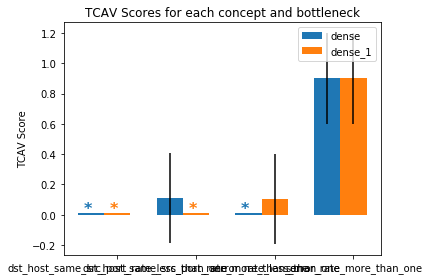

In [14]:
utils_plot.plot_results(results, num_random_exp=10)



In [10]:
from tcav.utils import print_results
print_results(results)

Class = imap.
  Concept = dst_host_same_src_port_rate_less_than_one
    Bottleneck = dense. TCAV Score = 0.82 (+- 0.37), random was 0.46 (+- 0.49). p-val = 0.027 (significant)
    Bottleneck = dense_1. TCAV Score = 0.95 (+- 0.15), random was 0.46 (+- 0.48). p-val = 0.002 (significant)
  Concept = dst_host_same_src_port_rate_more_than_one
    Bottleneck = dense. TCAV Score = 0.52 (+- 0.48), random was 0.46 (+- 0.49). p-val = 0.677 (not significant)
    Bottleneck = dense_1. TCAV Score = 0.48 (+- 0.45), random was 0.46 (+- 0.48). p-val = 0.878 (not significant)
  Concept = serror_rate_less_than_one
    Bottleneck = dense. TCAV Score = 0.74 (+- 0.35), random was 0.46 (+- 0.49). p-val = 0.079 (not significant)
    Bottleneck = dense_1. TCAV Score = 0.92 (+- 0.25), random was 0.46 (+- 0.48). p-val = 0.004 (significant)
  Concept = serror_rate_more_than_one
    Bottleneck = dense. TCAV Score = 0.90 (+- 0.30), random was 0.46 (+- 0.49). p-val = 0.006 (significant)
    Bottleneck = dense_1. TC